<a href="https://colab.research.google.com/github/alvinadar/Apriori-Market-Basket-Analysis/blob/main/Lesson_62_Apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

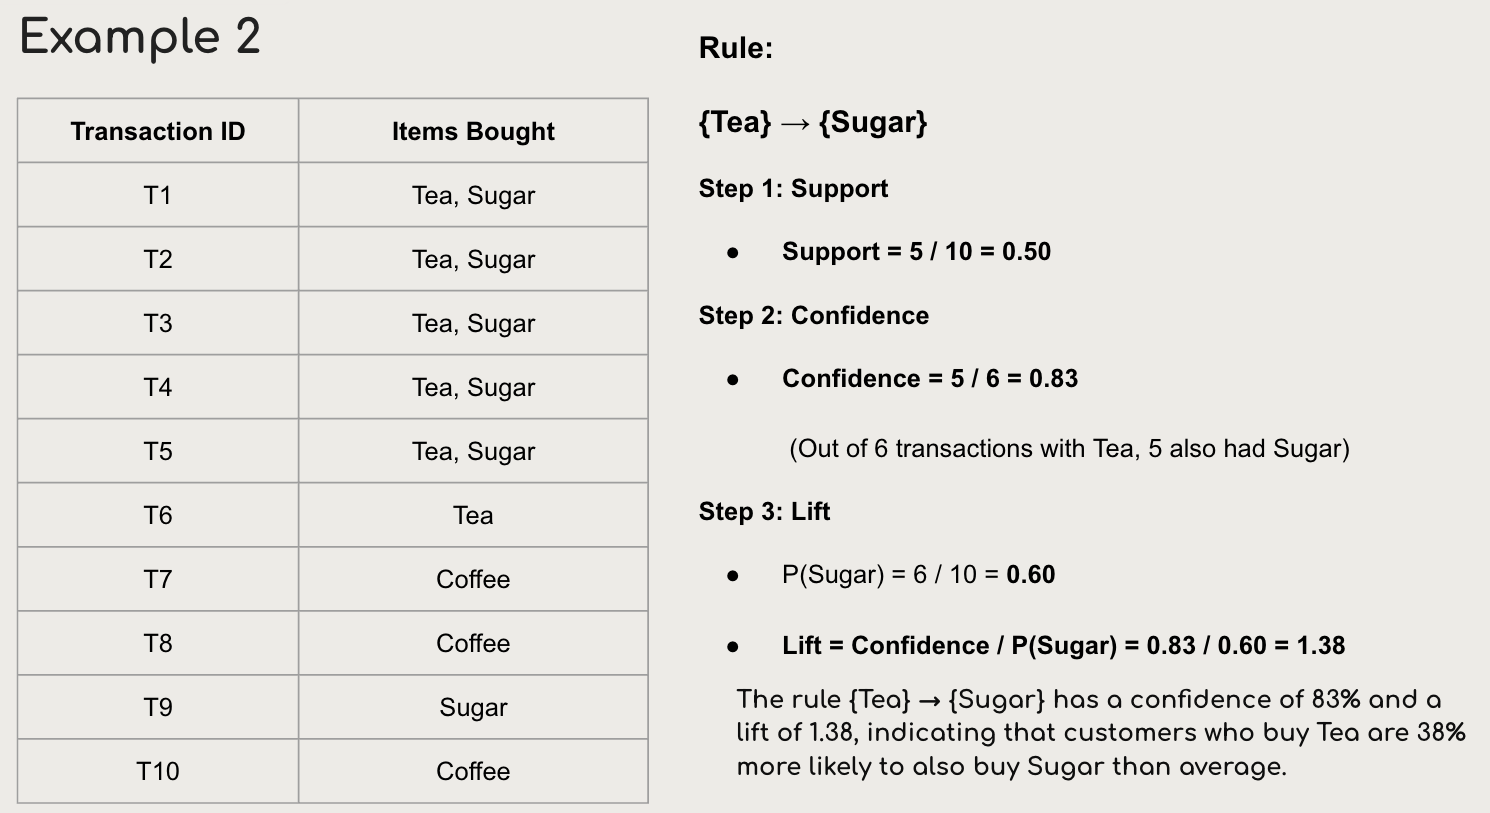

#Import Library

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

#Create the dataset

In [ ]:
transactions = [
    ['Tea', 'Sugar'],      # T1
    ['Tea', 'Sugar'],      # T2
    ['Tea', 'Sugar'],      # T3
    ['Tea', 'Sugar'],      # T4
    ['Tea', 'Sugar'],      # T5
    ['Tea'],               # T6
    ['Coffee'],            # T7
    ['Coffee'],            # T8
    ['Sugar'],             # T9
    ['Coffee']             # T10
]

# Step 2: Transform the dataset

In [ ]:
te = TransactionEncoder()
te_data = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_data,columns=te.columns_)

In [ ]:
df

,Coffee,Sugar,Tea
0,False,True,True
1,False,True,True
2,False,True,True
3,False,True,True
4,False,True,True
5,False,False,True
6,True,False,False
7,True,False,False
8,False,True,False
9,True,False,False


# Step 3: Apply Apriori

In [ ]:
frequent_itemsets = apriori(df,min_support=0.2,use_colnames=True)
#apriori(input1 : data,input2: min_support:Similart to the steps in the slided,input 3: Make the algo use the original column names  )

#Step 4 : Generate association rule

In [ ]:
rule = association_rules(frequent_itemsets,metric='confidence',min_threshold=0.6)
#"Confidence "-> Measures how often sugar is purchased when tea is purchased
#min_threshold = 0.6 ->Only rules with a confidence of 0.6 (or 60%) or higher will be included in the results.

In [ ]:
rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Tea),(Sugar),0.6,0.6,0.5,0.833333,1.388889,1.0,0.14,2.4,0.7,0.714286,0.583333,0.833333
1,(Sugar),(Tea),0.6,0.6,0.5,0.833333,1.388889,1.0,0.14,2.4,0.7,0.714286,0.583333,0.833333


# Step 5: Filter for Tea → Sugar

In [ ]:
tea_sugar_rules = rule[(rule['antecedents']=={"Tea"})&(rule['consequents']=={"Sugar"})]

#Display the result

In [ ]:
print("All Rules:")
print(rule[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

print("\nFiltered Rule (Tea → Sugar):")
print(tea_sugar_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

All Rules:
  antecedents consequents  support  confidence      lift
0       (Tea)     (Sugar)      0.5    0.833333  1.388889
1     (Sugar)       (Tea)      0.5    0.833333  1.388889

Filtered Rule (Tea → Sugar):
  antecedents consequents  support  confidence      lift
0       (Tea)     (Sugar)      0.5    0.833333  1.388889


#Example 2 : Market Basket Analysis
Source : https://www.kaggle.com/datasets/aslanahmedov/market-basket-analysis?utm_source=chatgpt.com

In [ ]:
df = pd.read_csv("/content/Assignment-1_Data.csv",delimiter= ";")

<ipython-input-100-8e679a9cd562>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/Assignment-1_Data.csv",delimiter= ";")


In [ ]:
df.isnull().sum()#Check for missing value
#Based on the missing value item name contains 1455 missing values

,0
BillNo,0
Itemname,1455
Quantity,0
Date,0
Price,0
CustomerID,134041
Country,0


In [ ]:
df = df.dropna(subset=["Itemname"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 520609 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      520609 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    520609 non-null  int64  
 3   Date        520609 non-null  object 
 4   Price       520609 non-null  object 
 5   CustomerID  388023 non-null  float64
 6   Country     520609 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 31.8+ MB


In [ ]:
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


#Group the Items with the bill

In [ ]:
transactions = df.groupby("BillNo")['Itemname'].apply(list).tolist()

# Step 2: Convert transactions into a one-hot encoded format

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_trans = pd.DataFrame(te_ary,columns=te.columns_)

In [ ]:
df_trans.head()

,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
frequent_itemsets = apriori(df_trans,min_support = 0.02,use_colnames=True)

In [ ]:
rules = association_rules(frequent_itemsets,metric = "lift",min_threshold=1)
rules['antecedents'] = rules['antecedents'].apply(lambda x: set(map(str.lower, x)))
rules['consequents'] = rules['consequents'].apply(lambda x: set(map(str.lower, x)))

#Since the rules output is big and not user friendly , we implement Gradio interface to identify the frequent items.

In [ ]:
rules["lift"].mean()

np.float64(8.4746661446952)

In [ ]:
rules[rules["lift"] > 8]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,{60 teatime fairy cake cases},{pack of 72 retrospot cake cases},0.039485,0.063286,0.021524,0.545113,8.613549,1.0,0.019025,2.059224,0.920240,0.264921,0.514380,0.442611
1,{pack of 72 retrospot cake cases},{60 teatime fairy cake cases},0.063286,0.039485,0.021524,0.340109,8.613549,1.0,0.019025,1.455567,0.943621,0.264921,0.312982,0.442611
2,{alarm clock bakelike pink},{alarm clock bakelike green},0.037556,0.047848,0.020336,0.541502,11.317223,1.0,0.018540,2.076677,0.947212,0.312548,0.518462,0.483264
3,{alarm clock bakelike green},{alarm clock bakelike pink},0.047848,0.037556,0.020336,0.425026,11.317223,1.0,0.018540,1.673891,0.957451,0.312548,0.402590,0.483264
4,{alarm clock bakelike red},{alarm clock bakelike green},0.050816,0.047848,0.031321,0.616358,12.881698,1.0,0.028890,2.481879,0.971751,0.465099,0.597080,0.635480
5,{alarm clock bakelike green},{alarm clock bakelike red},0.047848,0.050816,0.031321,0.654602,12.881698,1.0,0.028890,2.748085,0.968721,0.465099,0.636110,0.635480
6,{alarm clock bakelike red},{alarm clock bakelike pink},0.050816,0.037556,0.022464,0.442064,11.770908,1.0,0.020556,1.725009,0.964034,0.340841,0.420293,0.520110
7,{alarm clock bakelike pink},{alarm clock bakelike red},0.037556,0.050816,0.022464,0.598155,11.770908,1.0,0.020556,2.362067,0.950751,0.340841,0.576642,0.520110
8,{charlotte bag suki design},{charlotte bag pink polkadot},0.043295,0.036517,0.020188,0.466286,12.769152,1.0,0.018607,1.805242,0.963397,0.338589,0.446058,0.509566
9,{charlotte bag pink polkadot},{charlotte bag suki design},0.036517,0.043295,0.020188,0.552846,12.769152,1.0,0.018607,2.139539,0.956619,0.338589,0.532610,0.509566


In [ ]:
from google.colab import files

rules.to_csv("Association Rule.csv",index = False)
files.download("Association Rule.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Create Gradio Interface to interact with the model.

In [ ]:
#Step 1 : Create a Function for the interaction with the model

In [ ]:
def generate_associate_rule(items):

  item_list = [item.strip().lower() for item in items.split(',')] if items else []

  if item_list:
    filtered_rules = rules[
            (rules['antecedents'].apply(lambda x: set(item_list).issubset(x))) &
            (rules['lift'] > 8 )
        ]

  else:
    filtered_rules = rules[rules['lift']>1]

  if filtered_rules.empty:
    return pd.DataFrame([{
            'antecedents': 'No match',
            'consequents': 'No match',
            'support': '',
            'confidence': '',
            'lift': ''
        }])

   # Convert sets to strings for display

  result = filtered_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].copy()
  result['antecedents'] = result['antecedents'].apply(lambda x: ', '.join(x))
  result['consequents'] = result['consequents'].apply(lambda x: ', '.join(x))

  return result.head(10)

#Step 4 : Create the Gradio Interface

In [ ]:
pip install Gradio

In [ ]:
import gradio as gr

iface = gr.Interface(fn = generate_associate_rule,
                     inputs = gr.Textbox(lines = 1,placeholder = "Enter items seperated by commas(eg: tea,sugar)"),
                     outputs = 'dataframe',
                     title = "Market Basket Analysis",
                     description = "Please enter items to see the association rule with strong correlation (lift > 1)"
                     )

iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://53422b43d5683c2df1.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
